# Question 1
    Introduction:
    Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
    Occupations
    Step 1. Import the necessary libraries
    Step 2. Import the dataset from this address
    Step 3. Assign it to a variable called users
    Step 4. Discover what is the mean age per occupation
    Step 5. Discover the Male ratio per occupation and sort it from the most to the least
    Step 6. For each occupation, calculate the minimum and maximum ages
    Step 7. For each combination of occupation and sex, calculate the mean age
    Step 8. For each occupation present the percentage of women and men


Step 1 and Step 2

In [9]:
# Reference : https://www.kaggle.com/daguangya/pandas-exercises-3-2 
import pandas as pd
from fractions import Fraction
import decimal
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

Assign it to a variable called users

In [10]:
users=pd.read_csv(url,sep='|', error_bad_lines=False)
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


What is the mean age per occupation

In [11]:
occupation=users.groupby(['occupation'])['age'].agg(['mean','count'])
occupation

,mean,count
occupation,,
administrator,38.746835,79
artist,31.392857,28
doctor,43.571429,7
educator,42.010526,95
engineer,36.388060,67
entertainment,29.222222,18
executive,38.718750,32
healthcare,41.562500,16
homemaker,32.571429,7


Discover the Male ratio per occupation and sort it from the most to the least

In [3]:
occupation_men=users.groupby(['occupation'])['gender'].apply(lambda x: (x=='M').sum()).reset_index(name='men_count')
occupation=pd.merge(occupation,occupation_men,left_on='occupation',right_on='occupation')
def get_ratio(count,men):
    r=Fraction(men,count)
    return r
occupation['men_ratio']=occupation.apply(lambda x : get_ratio(x['count'],x['men_count']),axis=1 )
occupation.sort_values(by=['men_ratio'])

,occupation,mean,count,men_count,men_ratio
8,homemaker,32.571429,7,1,1/7
7,healthcare,41.562500,16,5,5/16
10,librarian,40.000000,51,22,22/51
1,artist,31.392857,28,15,15/28
0,administrator,38.746835,79,43,43/79
12,none,26.555556,9,5,5/9
20,writer,36.311111,45,26,26/45
11,marketing,37.615385,26,16,8/13
13,other,34.523810,105,69,23/35
18,student,22.081633,196,136,34/49


For each occupation, calculate the minimum and maximum ages

In [4]:
users.groupby(['occupation'], as_index=False)['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


For each combination of occupation and sex, calculate the mean age

In [5]:
users.groupby(['occupation','gender'], as_index=False)['age'].mean()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


For each occupation present the percentage of women and men

In [6]:
occupation=occupation.drop(['men_ratio'],axis=1)
def women_count(count,men):
    women=count-men
    return women
occupation['women_count']=occupation.apply(lambda x: women_count(x['count'],x['men_count']),axis=1)
def percent(total,g):
    p=(g/total)*100
    return p
occupation['women_percent']=occupation.apply(lambda x: percent(x['count'],x['women_count']),axis=1)
occupation['men_percent']=occupation.apply(lambda x: percent(x['count'],x['men_count']),axis=1)
occupation

,occupation,mean,count,men_count,women_count,women_percent,men_percent
0,administrator,38.746835,79,43,36,45.569620,54.430380
1,artist,31.392857,28,15,13,46.428571,53.571429
2,doctor,43.571429,7,7,0,0.000000,100.000000
3,educator,42.010526,95,69,26,27.368421,72.631579
4,engineer,36.388060,67,65,2,2.985075,97.014925
5,entertainment,29.222222,18,16,2,11.111111,88.888889
6,executive,38.718750,32,29,3,9.375000,90.625000
7,healthcare,41.562500,16,5,11,68.750000,31.250000
8,homemaker,32.571429,7,1,6,85.714286,14.285714
9,lawyer,36.750000,12,10,2,16.666667,83.333333


# Question 2

    Euro Teams
    Step 1. Import the necessary libraries
    Step 2. Import the dataset from this address
    Step 3. Assign it to a variable called euro12
    Step 4. Select only the Goal column
    Step 5. How many team participated in the Euro2012?
    Step 6. What is the number of columns in the dataset?
    Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
    to a dataframe called discipline
    Step 8. Sort the teams by Red Cards, then to Yellow Cards
    Step 9. Calculate the mean Yellow Cards given per Team
    Step 10. Filter teams that scored more than 6 goalsStep 
    Step 11. Select the teams that start with G
    Step 12. Select the first 7 columns
    Step 13. Select all columns except the last 3
    Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Step 1 and Step 2

In [14]:
# Reference : https://www.kaggle.com/daguangya/pandas-exercises-2-2
import pandas as pd
from fractions import Fraction
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Assign it to a variable called euro12

In [15]:
euro12=pd.read_csv(url, error_bad_lines=False)
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

How many team participated in the Euro2012?

In [16]:
euro12['Team'].count()

16

What is the number of columns in the dataset?

In [18]:
len(euro12.columns)

35

View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [19]:
discipline= euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Sort the teams by Red Cards, then to Yellow Cards

In [20]:
euro12=euro12.sort_values(by=['Red Cards','Yellow Cards'])
euro12[['Team','Red Cards','Yellow Cards']]

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9



Calculate the mean Yellow Cards given per Team

In [21]:
mean=euro12['Yellow Cards'].mean()
mean

7.4375

Filter teams that scored more than 6 goals

In [22]:
euro12['Team'][euro12.Goals >6]

5     Germany
13      Spain
Name: Team, dtype: object

Select the teams that start with G

In [23]:
euro12[['Team','Goals']][euro12.Team.str[0]=='G']

,Team,Goals
5,Germany,10
6,Greece,5


Select the first 7 columns

In [24]:
euro12.iloc[:5,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
2,Denmark,4,10,10,50.0%,20.0%,27
5,Germany,10,32,32,47.8%,15.6%,80
3,England,5,11,18,50.0%,17.2%,40
8,Netherlands,2,12,36,25.0%,4.1%,60
15,Ukraine,2,7,26,21.2%,6.0%,38


Select all columns except the last 3

In [25]:
euro12.iloc[:5,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,0,4,4,13,76.5%,48,31,4,5,0


Present only the Shooting Accuracy from England, Italy and Russia

In [26]:
euro12['Shooting Accuracy'][euro12.Team.str.contains('England|Italy|Russia',regex=True)]

3     50.0%
12    22.5%
7     43.0%
Name: Shooting Accuracy, dtype: object

# Question 3
    Housing
    Step 1. Import the necessary libraries
    Step 2. Create 3 different Series, each of length 100, as follows:
    • The first a random number from 1 to 4
    • The second a random number from 1 to 3
    • The third a random number from 10,000 to 30,000
    Step 3. Create a DataFrame by joining the Series by column
    Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
    Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
    to 'bigcolumn'
    Step 6. Ops it seems it is going only until index 99. Is it true?
    Step 7. Reindex the DataFrame so it goes from 0 to 299

Step 1 and Step 2

In [28]:
import pandas as pd
import numpy as np
series_a = pd.Series(np.random.randint(1,5,size=100))
series_b= pd.Series(np.random.randint(1,4,size=100))
series_c= pd.Series(np.random.randint(10000,30001,size=100))

Create a DataFrame by joining the Series by column

In [34]:
h=pd.concat([series_a,series_b,series_c],axis=1)

Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [38]:
h=h.rename(columns={0:'bedrs',1:'bathrs',2:'price_sqr_meter'})
h

,bedrs,bathrs,price_sqr_meter
0,2,3,11981
1,4,3,11585
2,1,2,29400
3,3,2,15373
4,3,1,20395
...,...,...,...
95,2,2,12187
96,3,1,12836
97,2,1,28240
98,4,2,26489


Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [40]:
bigcolumn = pd.concat([h.bedrs,h.bathrs,h.price_sqr_meter])
bigcolumn

0         2
1         4
2         1
3         3
4         3
      ...  
95    12187
96    12836
97    28240
98    26489
99    19253
Length: 300, dtype: int32

Ops it seems it is going only until index 99. Is it true?

yes, the index is only going until 99.

In [44]:
bigcolumn.head(101)

0     2
1     4
2     1
3     3
4     3
     ..
96    3
97    2
98    4
99    3
0     3
Length: 101, dtype: int32

Reindex the DataFrame so it goes from 0 to 299

In [46]:
index=np.arange(0,300)
index=pd.Series(index)
bigcolumn.index=index
bigcolumn.tail(20)

280    26813
281    27974
282    11445
283    18120
284    22731
285    17222
286    10194
287    23317
288    24427
289    19044
290    26803
291    16710
292    21383
293    16580
294    11164
295    12187
296    12836
297    28240
298    26489
299    19253
dtype: int32

# Question 4
    Wind Statistics
    The data have been modified to contain some missing values, identified by NaN.
    Using pandas should make this exercise easier, in particular for the bonus question.
    You should be able to perform all of these operations without using a for loop or
    other looping construct.
    The data in 'wind.data' has the following format:
    Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
    MAL
    61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
    61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
    61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
    The first three columns are year, month, and day. The remaining 12 columns are
    average windspeeds in knots at 12 locations in Ireland on that day.


Step 1 and Step 2

In [17]:
from datetime import date
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"

Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [18]:
data=pd.read_table(url, sep='\s+',parse_dates={'date':["Yr","Mo","Dy"]})
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [19]:
import datetime
data['date'] = pd.to_datetime(data['date'])
def set_date(x):
    if x.year > 2020:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
data['date'] = data['date'].apply(set_date)
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [20]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below


In [21]:
data.iloc[:,1:].isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Compute how many non-missing values there are in total.

In [22]:
data.iloc[:,1:].notna().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [23]:
data['sum']=data.sum(axis=1)
data['na']=data.isna().sum(axis=1)
def set_mean(s,na=0):
    t=12
    m=s/(t-na)
    return m
data['mean']=data.apply(lambda x: set_mean(x['sum'],x['na']),axis=1)
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,143.20,1,13.018182
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,124.70,1,11.336364
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,128.06,1,11.641818
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,79.43,0,6.619167
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,127.56,0,10.630000


Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [24]:
data.iloc[:,1:13].describe().T

,count,mean,std,min,25%,50%,75%,max
RPT,6568.0,12.362987,5.618413,0.67,8.12,11.71,15.92,35.80
VAL,6571.0,10.644314,5.267356,0.21,6.67,10.17,14.04,33.37
ROS,6572.0,11.660526,5.008450,1.50,8.00,10.92,14.67,33.84
KIL,6569.0,6.306468,3.605811,0.00,3.58,5.75,8.42,28.46
SHA,6572.0,10.455834,4.936125,0.13,6.75,9.96,13.54,37.54
BIR,6574.0,7.092254,3.968683,0.00,4.00,6.83,9.67,26.16
DUB,6571.0,9.797343,4.977555,0.00,6.00,9.21,12.96,30.37
CLA,6572.0,8.495053,4.499449,0.00,5.09,8.08,11.42,31.08
MUL,6571.0,8.493590,4.166872,0.00,5.37,8.17,11.19,25.88
CLO,6573.0,8.707332,4.503954,0.04,5.33,8.29,11.63,28.21


Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [26]:
day_stats=data.iloc[:,1:13].apply(pd.Series.describe,axis=1)
index=pd.Series(data['date'])
day_stats.index=index
day_stats.head()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
1961-01-01,11.0,13.018182,2.808875,9.29,10.5400,13.170,15.0000,18.50
1961-01-02,11.0,11.336364,3.188994,6.50,9.7300,10.830,13.2250,17.54
1961-01-03,11.0,11.641818,3.681912,6.17,9.3150,11.250,12.7300,18.50
1961-01-04,12.0,6.619167,3.198126,1.79,4.5700,5.855,9.1175,11.75
1961-01-05,12.0,10.630000,2.445356,6.17,9.8075,11.170,12.1700,13.33


Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.

In [27]:
windsp_month=data[data['date'].dt.month==1]
print("avg windspeed in jan for each location:")
windsp_month.iloc[:,1:13].mean()

avg windspeed in jan for each location:


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Downsample the record to a yearly frequency for each location.

In [31]:
data.index=index
datax=data.resample('Y').mean()
datax

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773,123.052247,0.076712,10.329156
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956,124.071808,0.008219,10.344116
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014,132.858630,0.000000,11.071553
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301,127.575656,0.000000,10.631305
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644,126.617068,0.000000,10.551422
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260,132.255644,0.000000,11.021304
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945,131.690438,0.000000,10.974203
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486,117.018087,0.000000,9.751507
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904,113.962849,0.000000,9.496904


Downsample the record to a monthly frequency for each location.

In [32]:
datay=data.resample('M').mean()
datay

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226,133.988387,0.161290,11.362928
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786,161.128571,0.071429,13.513580
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000,130.992903,0.161290,11.091186
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333,100.934000,0.000000,8.411167
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613,107.010000,0.096774,8.992612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194,91.110000,0.000000,7.592500
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333,132.272333,0.000000,11.022694
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000,110.806774,0.000000,9.233898


Downsample the record to a weekly frequency for each location.

In [33]:
dataz=data.resample('W').mean()
dataz

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,143.200000,1.000000,13.018182
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,115.585714,0.285714,9.905693
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,100.238571,0.000000,8.353214
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,111.140000,0.142857,9.444383
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,200.657143,0.142857,16.983626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,130.960000,0.000000,10.913333
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,191.260000,0.000000,15.938333
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,134.601429,0.000000,11.216786


Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [34]:
data_min=data.resample('W', label='left', loffset=pd.DateOffset(days=1)).min()
data_min

<ipython-input-34-50e1f9b76ca5>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data_min=data.resample('W', label='left', loffset=pd.DateOffset(days=1)).min()


,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,,
1960-12-26,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,143.20,1,13.018182
1961-01-02,1961-01-02,10.58,6.63,7.62,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,79.43,0,6.619167
1961-01-09,1961-01-09,9.04,3.54,7.08,0.67,2.29,0.96,2.50,0.58,0.50,2.67,5.25,5.17,47.71,0,3.975833
1961-01-16,1961-01-16,4.92,3.42,7.29,1.04,3.67,3.17,3.17,2.79,1.92,2.71,6.50,6.79,49.34,0,4.111667
1961-01-23,1961-01-23,13.62,9.96,12.67,6.04,10.00,9.42,9.25,8.71,7.12,11.04,14.04,17.50,131.58,0,10.965000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27,1978-11-27,9.08,4.54,8.21,0.96,4.54,1.00,1.96,2.04,1.29,3.29,4.92,11.50,62.58,0,5.215000
1978-12-04,1978-12-04,9.92,12.54,7.21,1.71,6.50,5.96,8.38,6.17,6.63,6.75,9.54,15.34,109.30,0,9.108333
1978-12-11,1978-12-11,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,6.92,48.87,0,4.072500


In [35]:
data_max=data.resample('w',label='left',loffset=pd.DateOffset(days=1)).max()
data_max

<ipython-input-35-d44ec308ddad>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data_max=data.resample('w',label='left',loffset=pd.DateOffset(days=1)).max()


,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,,
1960-12-26,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,143.20,1,13.018182
1961-01-02,1961-01-08,18.50,16.88,12.33,10.13,12.62,8.33,14.29,10.04,10.92,10.46,17.54,16.46,128.06,1,11.641818
1961-01-09,1961-01-15,19.75,12.08,19.50,10.54,10.37,9.46,15.54,11.50,10.37,14.58,20.71,16.92,162.29,0,13.524167
1961-01-16,1961-01-22,19.83,14.37,20.79,18.54,13.96,13.37,17.83,11.38,14.67,16.71,15.92,17.96,168.83,1,15.348182
1961-01-23,1961-01-29,25.04,23.91,25.84,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,27.63,242.27,1,22.024545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27,1978-12-03,21.29,21.34,24.04,12.79,18.21,19.29,21.54,17.21,16.71,17.83,21.42,25.75,228.65,0,19.054167
1978-12-04,1978-12-10,29.33,24.79,25.37,18.16,24.46,19.58,24.54,19.04,21.00,21.50,26.08,34.59,279.40,0,23.283333
1978-12-11,1978-12-17,23.13,24.04,18.05,11.63,18.12,13.37,14.83,13.88,15.54,16.29,21.50,22.83,201.75,0,16.812500


In [36]:
data_mean=data.resample('W',label='left',loffset=pd.DateOffset(days=1)).mean()
data_mean

<ipython-input-36-4a9137cc2b91>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data_mean=data.resample('W',label='left',loffset=pd.DateOffset(days=1)).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,sum,na,mean
date,,,,,,,,,,,,,,,
1960-12-26,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,143.200000,1.000000,13.018182
1961-01-02,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,115.585714,0.285714,9.905693
1961-01-09,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,100.238571,0.000000,8.353214
1961-01-16,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,111.140000,0.142857,9.444383
1961-01-23,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,200.657143,0.142857,16.983626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,130.960000,0.000000,10.913333
1978-12-04,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,191.260000,0.000000,15.938333
1978-12-11,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,134.601429,0.000000,11.216786


# Question 5

Step 1 and Step 2

In [37]:
import numpy as np
import pandas as pd
urlq5 = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Assign it to a variable called chipo.

In [38]:
chipo = pd.read_csv(urlq5, sep = '\t+')

<ipython-input-38-f47763ead479>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  chipo = pd.read_csv(urlq5, sep = '\t+')


See the first 10 entries

In [39]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


What is the number of observations in the dataset?

In [40]:
chipo.shape[0]

4622

What is the number of columns in the dataset?

In [41]:
chipo.shape[1]

5

Print the name of all the columns.

In [42]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

How is the dataset indexed?

In [43]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Which was the most-ordered item?

In [44]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

For the most-ordered item, how many items were ordered?

In [46]:
order=chipo.groupby(['item_name'])['quantity'].sum()
print(order.idxmax())
order.max()

Chicken Bowl


761

What was the most ordered item in the choice_description column?

In [47]:
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                 134
[Coke]                                                                                      123
[Sprite]                                                                                     77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                       42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]            40
                                                                                           ... 
[Tomatillo-Red Chili Salsa (Hot), [Rice, Pinto Beans, Cheese]]                                1
[Adobo-Marinated and Grilled Chicken]                                                         1
[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Cheese, Lettuce]]                     1
[Roasted Chili Corn Salsa (Medium), [Fajita Veggies, Cheese, Lettuce, Sour Cream, Rice]]      1
[Tomatillo Red Chili Salsa, [Cheese, Bla

How many items were orderd in total?

In [48]:
chipo['quantity'].sum()

4972

 Step 13.

a) Turn the item price into a float

b) Check the item price type

c) Create a lambda function and change the type of item price

d) Check the item price type

In [62]:
chipocpy = chipo.copy()
chipocpy['item_price'] = chipo['item_price'].str[1:]
chipocpy.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [63]:
chipocpy2 = chipo.copy()
chipocpy2['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipocpy2.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [64]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

How much was the revenue for the period in the dataset?

In [65]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['revenue_per_order'] = chipo['quantity'] * chipo['item_price']
totalRevenue = chipo['revenue_per_order'].sum()
totalRevenue

39237.02

How many orders were made in the period?

In [66]:
totalOrders = chipo['order_id'].count()
totalOrders

4622

What is the average revenue amount per order?

In [67]:
totalRevenue / totalOrders

8.48918649935093

How many different items are sold?

In [68]:
len(chipo['item_name'].value_counts())

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

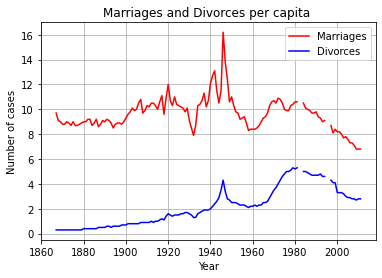

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

usMarriageDivorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

plt.plot(usMarriageDivorce['Year'], usMarriageDivorce['Marriages_per_1000'], color='red', label='Marriages')
plt.plot(usMarriageDivorce['Year'], usMarriageDivorce['Divorces_per_1000'], color='blue', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.title('Marriages and Divorces per capita ')
plt.grid(True)
plt.legend()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Text(0.5, 1.0, 'US Marriages VS Divorces')

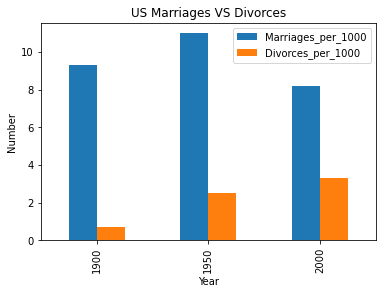

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

usMarriageDivorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')
usMarriageDivorce = usMarriageDivorce[(usMarriageDivorce.Year == 1900) | (usMarriageDivorce.Year == 1950) | (usMarriageDivorce.Year == 2000)]
usMarriageDivorce = usMarriageDivorce.drop(columns = ['Marriages', 'Divorces', 'Population'])
usMarriageDivorce = usMarriageDivorce.set_index('Year')
usMarriageDivorce.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('US Marriages VS Divorces')

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.

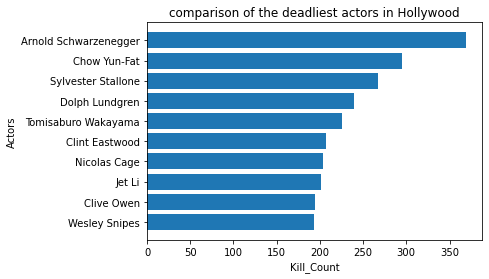

In [74]:
import matplotlib.pyplot as plt
kill = pd.read_csv('actor_kill_counts.csv', error_bad_lines=False)
kill=kill.sort_values(by=['Count'])
actor=kill['Actor'].tolist()
Count=kill['Count'].tolist()
plt.barh(actor, Count)
plt.ylabel("Actors")
plt.xlabel("Kill_Count") 
plt.title("comparison of the deadliest actors in Hollywood")
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

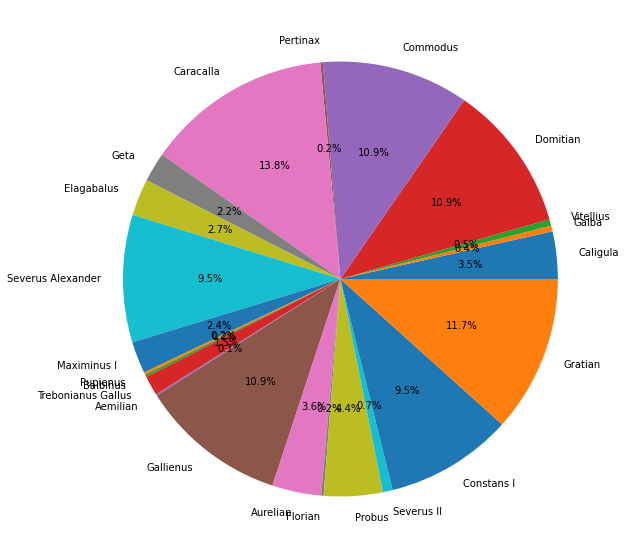

In [88]:
roman = pd.read_csv('roman-emperor-reigns.csv', error_bad_lines=False)
rn=roman.loc[(roman['Cause_of_Death']=='Assassinated')]
w=rn['Length_of_Reign']
king=rn['Emperor']
fig = plt.figure(figsize =(20, 10))
plt.pie(w, labels = king,autopct='%1.1f%%')
plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.

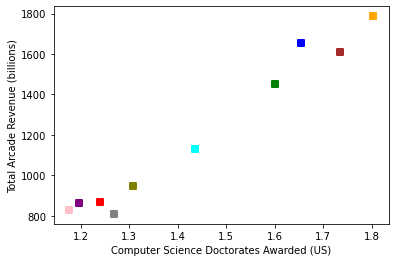

In [86]:
x = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', error_bad_lines=False)
arc=x['Total Arcade Revenue (billions)'].tolist()
cs=x['Computer Science Doctorates Awarded (US)'].tolist() 
plt.scatter(arc, cs,c =['purple', 'pink', 'gray','red', 'olive', 'cyan','green','blue','orange','brown'],
            linewidths = 2, 
            marker ="s")
  
plt.xlabel("Computer Science Doctorates Awarded (US)")
plt.ylabel("Total Arcade Revenue (billions)")
plt.show()